# Sınıflandırma (Classification)
##VERİ HAZIRLIK SÜRECİ

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("kidney_disease.csv")
print(df)
#ilgili kütüphaneler tanıtıldı,veri dosyası okundu.

      id   age     bp     sg   al   su       rbc        pc         pcc  \
0      0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1      1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2      2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3      3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4      4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5      5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6      6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7      7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8      8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9      9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   
10    10  50.0   60.0  1.010  2.0  4.0       NaN  abnormal     present   
11    11  63.0   70.0  1.010  3.0  0.0  abnormal  abnormal     present   
12    12  68.0   70.0  1.015  3.0  1.0

In [2]:
print(df.info())
#verisetinin fotoğrafını çekmek,eksik veriler var,veri tipleri int ve float şeklinde olmalı.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [3]:
print(df.dtypes) #object olan veritipleri düzeltilmeli(14 tane var) ve bu düzeltilmesi gereken verilerin  hepsi kategorik veri.

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [4]:
print(df.describe())

               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006 

In [5]:
#özellik seçimi
df.drop("id",inplace=True,axis=1)
print(df.head())

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr      ...        pcv    wc   rc  htn   dm cad appet   pe  ane  \
0  121.0      ...         44  7800  5.2  yes  yes  no  good   no   no   
1    NaN      ...         38  6000  NaN   no   no  no  good   no   no   
2  423.0      ...         31  7500  NaN   no  yes  no  poor   no  yes   
3  117.0      ...         32  6700  3.9  yes   no  no  poor  yes  yes   
4  106.0      ...         35  7300  4.6   no   no  no  good   no   no   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4        

In [6]:
print(df.pcv.unique())
print("")
print(df.wc.unique())
print("")
print(df.rc.unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600']

['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4

In [7]:
df["pcv"]=df["pcv"].str.strip("\t")
df["wc"]=df["wc"].str.strip("\t")
df["rc"]=df["rc"].str.strip("\t")


In [8]:
print(df.pcv.unique())
print(df.wc.unique())
print(df.rc.unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '?' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9'

In [9]:
missing_val=["na","n/a-","--","nan","?","\t?"]
df=pd.read_csv("kidney_disease.csv",na_values=missing_val)
df.drop("id",inplace=True,axis=1)
print(df) #eksik verileri "NaN" formatında olduğu görülmekte
print(df())

      age     bp     sg   al   su       rbc        pc         pcc          ba  \
0    48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent  notpresent   
1     7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent  notpresent   
2    62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent   
3    48.0   70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent   
4    51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent   
5    60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent  notpresent   
6    68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent  notpresent   
7    24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent  notpresent   
8    52.0  100.0  1.015  3.0  0.0    normal  abnormal     present  notpresent   
9    53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present  notpresent   
10   50.0   60.0  1.010  2.0  4.0       NaN  abnormal     present  notpresent   
11   63.0   70.0  1.010  3.0

TypeError: 'DataFrame' object is not callable

In [ ]:
#pcv,wc ve rc veri tipleri object ama float veya integer olmalı

donusum = {"pcv":float, 
           "wc":float,
           "rc":float} 
df=df.astype(donusum)
print(df.dtypes)

In [ ]:
df.isnull().sum() #hangi sütunda ne kadar missing value olduğuna bakalım.(standart missing value)

In [10]:
df.isnull().sum().sum() #toplamda 1012 tane eksik verimiz gözüküyor.

1012

In [11]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)

In [12]:
print(df.isnull().sum())

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [13]:
df.dropna(inplace=True)

In [14]:
print(df.isnull().sum().sum())

0


In [15]:
#kategorik verilerin düzenlenmesi
df.rbc.unique()


array(['normal', 'abnormal'], dtype=object)

In [16]:
df.rbc=[1 if row=="abnormal" else 0 for row in df.rbc]

In [17]:
df.pc.unique()


array(['normal', 'abnormal'], dtype=object)

In [18]:
df.pc=[1 if row=="abnormal" else 0 for row in df.pc]

In [19]:
df.pcc.unique()

array(['notpresent', 'present'], dtype=object)

In [20]:
df.pcc=[1 if row=="present" else 0 for row in df.pcc]

In [21]:
df.ba.unique()

array(['notpresent', 'present'], dtype=object)

In [22]:
df.pcc=[1 if row=="present" else 0 for row in df.pcc]

In [23]:
df.ba.unique()

array(['notpresent', 'present'], dtype=object)

In [24]:
df.ba=[1 if row=="present" else 0 for row in df.ba]

In [25]:
df.htn.unique()

array(['no', 'yes'], dtype=object)

In [26]:
df.htn=[1 if row=="yes" else 0 for row in df.htn]

In [27]:
df.dm.unique()

array(['yes', 'no'], dtype=object)

In [28]:
df.dm=[1 if row=="yes" else 0 for row in df.dm]

In [29]:
df.cad.unique()

array(['no', 'yes', '\tno'], dtype=object)

In [30]:
df.cad=[1 if row=="yes" else 0 for row in df.cad]

In [31]:
df.appet.unique()

array(['poor', 'good'], dtype=object)

In [32]:
df.appet=[1 if row=="good" else 0 for row in df.appet]

In [33]:
df.pe.unique()

array(['no', 'yes'], dtype=object)

In [34]:
df.pe=[1 if row=="yes" else 0 for row in df.pe]

In [35]:
df.ane.unique()

array(['yes', 'no'], dtype=object)

In [36]:
df.ane=[1 if row=="yes" else 0 for row in df.ane]

In [37]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [38]:
df.classification=df.classification.replace("ckd\t","ckd")

In [39]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [40]:
df.classification=[1 if row=="ckd" else 0 for row in df.classification]

In [41]:
#tekrarlayan verilere bakalım
print(df.duplicated())


2      False
3      False
4      False
7      False
8      False
9      False
11     False
14     False
20     False
22     False
24     False
27     False
29     False
33     False
35     False
36     False
38     False
40     False
44     False
48     False
49     False
55     False
56     False
58     False
61     False
63     False
66     False
67     False
71     False
73     False
       ...  
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
Length: 233, dtype: bool


In [42]:
#tekrarlayan verilere bakalım
print(df.duplicated())


2      False
3      False
4      False
7      False
8      False
9      False
11     False
14     False
20     False
22     False
24     False
27     False
29     False
33     False
35     False
36     False
38     False
40     False
44     False
48     False
49     False
55     False
56     False
58     False
61     False
63     False
66     False
67     False
71     False
73     False
       ...  
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
Length: 233, dtype: bool


In [45]:
df.reset_index(inplace=True,drop=True)#restleyelim
print(df.head(10))
df.shape

    age          bp     sg   al   su  rbc  pc  pcc  ba    bgr       ...        \
0  62.0   80.000000  1.010  2.0  3.0    0   0    0   0  423.0       ...         
1  48.0   70.000000  1.005  4.0  0.0    0   1    0   0  117.0       ...         
2  51.0   80.000000  1.010  2.0  0.0    0   0    0   0  106.0       ...         
3  24.0   76.469072  1.015  2.0  4.0    0   1    0   0  410.0       ...         
4  52.0  100.000000  1.015  3.0  0.0    0   1    0   0  138.0       ...         
5  53.0   90.000000  1.020  2.0  0.0    1   1    0   0   70.0       ...         
6  63.0   70.000000  1.010  3.0  0.0    1   1    0   0  380.0       ...         
7  68.0   80.000000  1.010  3.0  2.0    0   1    0   1  157.0       ...         
8  61.0   80.000000  1.015  2.0  0.0    1   1    0   0  173.0       ...         
9  48.0   80.000000  1.025  4.0  0.0    0   1    0   0   95.0       ...         

    pcv       wc        rc  htn  dm  cad  appet  pe  ane  classification  
0  31.0   7500.0  4.707435    0  

(233, 25)

In [44]:
#aşırı verilerin kontrolü
from scipy import stats

print(df["bp"].mean())
print(df["bp"].std())
print(np.median(df["bp"])) #median ve mean değerleri birbirine yakın 

75.04667935047121
11.658415081629835
76.46907216494846


In [671]:
q_low  = df["bp"].quantile(0.025)
print(q_low)

print(df[df["bp"]<q_low]) #bp=50.0 aykırı bir durum gözükmemekte

60.0
     age    bp    sg   al   su  rbc  pc  pcc  ba         bgr       ...        \
71   8.0  50.0  1.02  4.0  0.0    0   0    0   0  148.036517       ...         
87  59.0  50.0  1.01  3.0  0.0    0   1    0   0  241.000000       ...         

          pcv            wc        rc  htn  dm  cad  appet  pe  ane  \
71  38.884498   8406.122449  4.707435    0   0    0      1   1    0   
87  31.000000  15700.000000  3.800000    0   1    0      1   1    0   

    classification  
71               1  
87               1  

[2 rows x 25 columns]


In [672]:
q_hi  = df["bp"].quantile(0.975)
print(q_hi)

print(df[df["bp"]>q_hi]) #bp=110.0 

100.0
     age     bp     sg   al   su  rbc  pc  pcc  ba    bgr       ...        \
94  48.0  110.0  1.015  3.0  0.0    1   0    0   0  106.0       ...         

     pcv      wc   rc  htn  dm  cad  appet  pe  ane  classification  
94  26.0  5000.0  2.5    1   0    1      1   0    1               1  

[1 rows x 25 columns]


In [673]:

print(df["sg"].mean())
print(df["sg"].std())
print(np.median(df["sg"]))

1.018744240051555
0.005738291458537072
1.02


In [674]:
q_low  = df["sg"].quantile(0.025)
print(q_low)

print(df[df["sg"]<q_low]) #sg=1.005

1.005
Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]


In [675]:
q_hi  = df["sg"].quantile(0.975)
print(q_hi)

print(df[df["sg"]>q_hi]) #sg'de aykırı bir veri yok

1.025
Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]


In [676]:
print(df["al"].mean())
print(df["al"].std())
print(np.median(df["al"]))

1.0558667345602677
1.4387989975339324
0.0


In [677]:
q_low  = df["al"].quantile(0.025)
print(q_low)

print(df[df["al"]<q_low])

0.0
Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]


In [678]:
q_hi  = df["al"].quantile(0.975)
print(q_hi)

print(df[df["al"]>q_hi]) #al=5.0 uç bir değer değil

4.0
     age    bp     sg   al   su  rbc  pc  pcc  ba         bgr       ...        \
52  57.0  90.0  1.015  5.0  0.0    1   1    0   1  148.036517       ...         

     pcv      wc   rc  htn  dm  cad  appet  pe  ane  classification  
52  24.0  4200.0  3.3    1   1    1      0   1    1               1  

[1 rows x 25 columns]


In [679]:
print(df["bgr"].mean())
print(df["bgr"].std())
print(np.median(df["bgr"]))

140.3380551670926
69.58224078953845
122.0


In [680]:
q_low  = df["bgr"].quantile(0.025)
print(q_low)

print(df[df["bgr"]<q_low])

74.80000000000001
      age    bp     sg   al   su  rbc  pc  pcc  ba   bgr       ...        \
5    53.0  90.0  1.020  2.0  0.0    1   1    0   0  70.0       ...         
19   73.0  70.0  1.005  0.0  0.0    0   0    0   0  70.0       ...         
65   17.0  70.0  1.015  1.0  0.0    1   0    0   0  22.0       ...         
99   23.0  80.0  1.025  0.0  0.0    0   0    0   0  70.0       ...         
195  29.0  80.0  1.020  0.0  0.0    0   0    0   0  70.0       ...         
209  70.0  80.0  1.020  0.0  0.0    0   0    0   0  74.0       ...         

      pcv       wc        rc  htn  dm  cad  appet  pe  ane  classification  
5    29.0  12100.0  3.700000    1   1    0      0   0    1               1  
19   29.0  18900.0  3.500000    1   1    0      1   1    0               1  
65   41.0  11200.0  4.707435    0   0    0      1   0    0               1  
99   52.0   9800.0  5.000000    0   0    0      1   0    0               0  
195  54.0   5400.0  5.800000    0   0    0      1   0    0      

In [681]:
q_hi  = df["bgr"].quantile(0.975)
print(q_hi)

print(df[df["bgr"]>q_hi]) 

385.99999999999966
     age         bp     sg   al   su  rbc  pc  pcc  ba    bgr       ...        \
0   62.0  80.000000  1.010  2.0  3.0    0   0    0   0  423.0       ...         
3   24.0  76.469072  1.015  2.0  4.0    0   1    0   0  410.0       ...         
27  45.0  80.000000  1.020  3.0  0.0    0   1    0   0  425.0       ...         
61  71.0  60.000000  1.020  3.0  2.0    0   0    0   0  424.0       ...         
85  60.0  90.000000  1.010  3.0  5.0    1   0    0   1  490.0       ...         
96  59.0  70.000000  1.010  1.0  3.0    1   1    0   0  424.0       ...         

          pcv            wc        rc  htn  dm  cad  appet  pe  ane  \
0   31.000000   7500.000000  4.707435    0   1    0      0   0    1   
3   44.000000   6900.000000  5.000000    0   1    0      1   1    0   
27  38.884498   8406.122449  4.707435    0   0    0      0   0    0   
61  31.000000   8406.122449  4.707435    1   1    1      1   0    0   
85  35.000000  12000.000000  4.500000    1   1    0      1

In [682]:
print(df["pcv"].mean())
print(df["pcv"].std())
print(np.median(df["pcv"]))

40.251392566888875
8.913716191277741
41.0


In [683]:
q_low  = df["pcv"].quantile(0.025)
print(q_low)

print(df[df["pcv"]<q_low]) #pcv=9.0 değeri düşük geldi

21.6
          age     bp     sg   al   su  rbc  pc  pcc  ba         bgr  \
7   68.000000   80.0  1.010  3.0  2.0    0   1    0   1  157.000000   
29  51.483376  100.0  1.015  2.0  0.0    1   1    0   0  129.000000   
49  67.000000   70.0  1.010  1.0  0.0    0   0    0   0  148.036517   
76  32.000000   90.0  1.025  1.0  0.0    1   1    0   0  148.036517   
81  59.000000  100.0  1.015  4.0  2.0    0   0    0   0  255.000000   
97  56.000000   90.0  1.010  4.0  1.0    0   1    0   0  176.000000   

         ...         pcv       wc        rc  htn  dm  cad  appet  pe  ane  \
7        ...        16.0  11000.0  2.600000    1   1    1      0   1    0   
29       ...        14.0   6300.0  4.707435    1   0    0      1   1    1   
49       ...        19.0   6500.0  4.707435    1   0    0      1   0    1   
76       ...        15.0   2600.0  2.800000    1   1    0      0   1    1   
81       ...        20.0   9800.0  3.900000    1   1    1      1   0    1   
97       ...         9.0   5400.0  

In [684]:
q_hi  = df["pcv"].quantile(0.975)
print(q_hi)

print(df[df["pcv"]>q_hi])

53.0
      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr       ...        \
195  29.0  80.0  1.020  0.0  0.0    0   0    0   0   70.0       ...         
214  59.0  60.0  1.020  0.0  0.0    0   0    0   0  113.0       ...         
226  43.0  60.0  1.025  0.0  0.0    0   0    0   0  117.0       ...         
229  42.0  70.0  1.025  0.0  0.0    0   0    0   0   75.0       ...         

      pcv      wc   rc  htn  dm  cad  appet  pe  ane  classification  
195  54.0  5400.0  5.8    0   0    0      1   0    0               0  
214  54.0  6500.0  4.9    0   0    0      1   0    0               0  
226  54.0  7400.0  5.4    0   0    0      1   0    0               0  
229  54.0  7800.0  6.2    0   0    0      1   0    0               0  

[4 rows x 25 columns]


In [685]:
print(df["wc"].mean())
print(df["wc"].std())
print(np.median(df["wc"]))

8391.503897696422
2936.08974263784
8406.122448979591


In [686]:
q_low  = df["wc"].quantile(0.025)
print(q_low)

print(df[df["wc"]<q_low])

4300.0
     age     bp     sg   al   su  rbc  pc  pcc  ba         bgr  \
33  59.0   70.0  1.010  3.0  0.0    0   1    0   0   76.000000   
52  57.0   90.0  1.015  5.0  0.0    1   1    0   1  148.036517   
63  34.0   70.0  1.020  0.0  0.0    1   0    0   0  139.000000   
76  32.0   90.0  1.025  1.0  0.0    1   1    0   0  148.036517   
91  37.0  100.0  1.010  0.0  0.0    1   0    0   0  148.036517   

         ...         pcv      wc        rc  htn  dm  cad  appet  pe  ane  \
33       ...        22.0  3800.0  2.100000    1   0    0      0   1    1   
52       ...        24.0  4200.0  3.300000    1   1    1      0   1    1   
63       ...        42.0  2200.0  4.707435    0   0    0      0   0    0   
76       ...        15.0  2600.0  2.800000    1   1    0      0   1    1   
91       ...        44.0  4100.0  5.200000    1   0    0      1   0    0   

    classification  
33               1  
52               1  
63               1  
76               1  
91               1  

[5 rows x 25

In [687]:
q_hi  = df["wc"].quantile(0.975)
print(q_hi)

print(df[df["wc"]>q_hi])

15819.999999999993
     age     bp     sg   al   su  rbc  pc  pcc  ba    bgr       ...        \
19  73.0   70.0  1.005  0.0  0.0    0   0    0   0   70.0       ...         
20  60.0   70.0  1.010  2.0  0.0    0   1    0   0  144.0       ...         
46  50.0   90.0  1.010  2.0  0.0    0   1    0   1  128.0       ...         
70  45.0   70.0  1.025  2.0  0.0    0   1    0   0  117.0       ...         
74   6.0   60.0  1.010  4.0  0.0    1   1    0   1   94.0       ...         
79  59.0  100.0  1.020  4.0  2.0    0   0    0   0  252.0       ...         

     pcv       wc   rc  htn  dm  cad  appet  pe  ane  classification  
19  29.0  18900.0  3.5    1   1    0      1   1    0               1  
20  29.0  21600.0  3.5    1   1    0      0   0    1               1  
46  22.0  16300.0  2.7    0   0    0      0   1    1               1  
70  30.0  19100.0  3.7    0   0    0      1   0    0               1  
74  30.0  16700.0  4.8    0   0    0      0   0    0               1  
79  30.0  26400

In [688]:
print(df["rc"].mean())
print(df["rc"].std())
print(np.median(df["rc"]))

4.836692885747564
0.9109463767299036
4.707434944237919


In [689]:
q_low  = df["rc"].quantile(0.025)
print(q_low)

print(df[df["rc"]<q_low])

2.88
     age     bp     sg   al   su  rbc  pc  pcc  ba         bgr  \
7   68.0   80.0  1.010  3.0  2.0    0   1    0   1  157.000000   
33  59.0   70.0  1.010  3.0  0.0    0   1    0   0   76.000000   
46  50.0   90.0  1.010  2.0  0.0    0   1    0   1  128.000000   
76  32.0   90.0  1.025  1.0  0.0    1   1    0   0  148.036517   
94  48.0  110.0  1.015  3.0  0.0    1   0    0   0  106.000000   
97  56.0   90.0  1.010  4.0  1.0    0   1    0   0  176.000000   

         ...         pcv       wc   rc  htn  dm  cad  appet  pe  ane  \
7        ...        16.0  11000.0  2.6    1   1    1      0   1    0   
33       ...        22.0   3800.0  2.1    1   0    0      0   1    1   
46       ...        22.0  16300.0  2.7    0   0    0      0   1    1   
76       ...        15.0   2600.0  2.8    1   1    0      0   1    1   
94       ...        26.0   5000.0  2.5    1   0    1      1   0    1   
97       ...         9.0   5400.0  2.1    1   1    0      0   1    1   

    classification  
7     

In [690]:
q_hi  = df["rc"].quantile(0.975)
print(q_hi)

print(df[df["rc"]>q_hi])

6.4
      age     bp     sg   al   su  rbc  pc  pcc  ba    bgr       ...        \
47   70.0  100.0  1.015  4.0  0.0    0   0    0   0  118.0       ...         
162  58.0   80.0  1.020  0.0  0.0    0   0    0   0  100.0       ...         
215  48.0   80.0  1.025  0.0  0.0    0   0    0   0   75.0       ...         
219  46.0   70.0  1.025  0.0  0.0    0   0    0   0  100.0       ...         

      pcv      wc   rc  htn  dm  cad  appet  pe  ane  classification  
47   37.0  8400.0  8.0    1   0    0      1   0    0               1  
162  50.0  6700.0  6.5    0   0    0      1   0    0               0  
215  51.0  6000.0  6.5    0   0    0      1   0    0               0  
219  43.0  5700.0  6.5    0   0    0      1   0    0               0  

[4 rows x 25 columns]


In [691]:
#normalizasyon
parameters = [['age', 'bp','sg','al','su','bgr','bu', 'sc', 'sod','pot','hemo','pcv','wc', 'rc']]

for i in parameters:
    x=(df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))
print(x)    


          age        bp    sg   al   su       bgr        bu        sc  \
0    0.740741  0.500000  0.25  0.4  0.6  0.856838  0.132221  0.044304   
1    0.567901  0.333333  0.00  0.8  0.0  0.202991  0.139923  0.107595   
2    0.604938  0.500000  0.25  0.4  0.0  0.179487  0.062901  0.031646   
3    0.271605  0.441151  0.50  0.4  0.8  0.829060  0.075738  0.022152   
4    0.617284  0.833333  0.50  0.6  0.0  0.247863  0.150193  0.047468   
5    0.629630  0.666667  0.75  0.4  0.0  0.102564  0.270860  0.215190   
6    0.753086  0.333333  0.25  0.6  0.0  0.764957  0.150193  0.072785   
7    0.814815  0.500000  0.25  0.6  0.4  0.288462  0.227214  0.117089   
8    0.728395  0.500000  0.50  0.4  0.0  0.322650  0.376123  0.110759   
9    0.567901  0.500000  1.00  0.8  0.0  0.155983  0.414634  0.231013   
10   0.493827  0.833333  0.50  0.8  0.0  0.269309  0.124519  0.031646   
11   0.827160  0.333333  0.25  0.6  0.8  0.517094  0.219512  0.072785   
12   0.814815  0.333333  0.00  0.2  0.0  0.269309  

In [692]:
dfNew=pd.concat([df.loc[:,["rbc","pc","pcc","ba","pcv","wc","rc","htn","dm","cad","appet","pe","ane","classification"]],x],axis=1)
print(dfNew)

     rbc  pc  pcc  ba        pcv            wc        rc  htn  dm  cad  \
0      0   0    0   0  31.000000   7500.000000  4.707435    0   1    0   
1      0   1    0   0  32.000000   6700.000000  3.900000    1   0    0   
2      0   0    0   0  35.000000   7300.000000  4.600000    0   0    0   
3      0   1    0   0  44.000000   6900.000000  5.000000    0   1    0   
4      0   1    0   0  33.000000   9600.000000  4.000000    1   1    0   
5      1   1    0   0  29.000000  12100.000000  3.700000    1   1    0   
6      1   1    0   0  32.000000   4500.000000  3.800000    1   1    0   
7      0   1    0   1  16.000000  11000.000000  2.600000    1   1    1   
8      1   1    0   0  24.000000   9200.000000  3.200000    1   1    1   
9      0   1    0   0  32.000000   6900.000000  3.400000    1   0    0   
10     0   1    0   1  39.000000   8300.000000  4.600000    1   0    0   
11     0   1    0   0  37.000000   9600.000000  4.100000    1   1    1   
12     1   1    0   0  38.000000   840

In [693]:
dfNew.to_csv("Newkidney_disease.csv")

# Knn,Svm,Decision Tree,Random Forest

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("Newkidney_disease.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 29 columns):
Unnamed: 0        233 non-null int64
rbc               233 non-null int64
pc                233 non-null int64
pcc               233 non-null int64
ba                233 non-null int64
pcv               233 non-null float64
wc                233 non-null float64
rc                233 non-null float64
htn               233 non-null int64
dm                233 non-null int64
cad               233 non-null int64
appet             233 non-null int64
pe                233 non-null int64
ane               233 non-null int64
classification    233 non-null int64
age               233 non-null float64
bp                233 non-null float64
sg                233 non-null float64
al                233 non-null float64
su                233 non-null float64
bgr               233 non-null float64
bu                233 non-null float64
sc                233 non-null float64
sod               233 

In [715]:
y=df.classification.values
x_data=df.drop(["classification"],axis=1)

In [716]:
x=x_data # n_neighbors=5 iken knn_score=0.7659574468085106 olmaktadır.
#x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) normalizasyon veri setinde yapıldığı için tekrar yapılmadı.

In [717]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [732]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
print("knn_score",knn_score)

f1_knn=f1_score(y_test,knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)

print("KNN f1 score: ",f1_knn)
print("KNN Precision: ",precision_knn)
print("KNN Recall: ", recall_knn)
print("KNN accuracy score: ",knn.score(x_test,y_test))


knn_score 0.8936170212765957
KNN f1 score:  0.8837209302325582
KNN Precision:  1.0
KNN Recall:  0.7916666666666666
KNN accuracy score:  0.8936170212765957


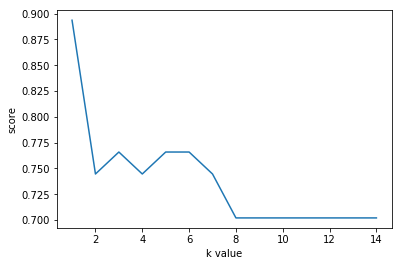

In [710]:
score_list=[]
for i in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k value")
plt.ylabel("score")
plt.show() #en iyi n_neighbors değeri 1 olarak gözükmektedir.

In [728]:

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

svm_pred=svm.predict(x_test)

f1_svm=f1_score(y_test,svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)

print("SVM f1 score: ",f1_svm)
print("SVM Precision: ",precision_svm)
print("SVM Recall: ", recall_svm)
print("SVM accuracy score: ",svm.score(x_test,y_test))

print("svm score:",svm.score(x_test,y_test))

SVM f1 score:  0.3448275862068966
SVM Precision:  1.0
SVM Recall:  0.20833333333333334
SVM accuracy score:  0.5957446808510638
svm score: 0.5957446808510638


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [729]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

dt_pred=dt.predict(x_test)

f1_dt=f1_score(y_test,dt_pred)

precision_dt = precision_score(y_test, dt_pred)

recall_dt = recall_score(y_test, dt_pred)

print("DT f1 score: ",f1_dt)
print("DT Precision: ",precision_dt)
print("DT Recall: ",recall_dt)
print("DT accuracy score: ",dt.score(x_test,y_test))

print("dt score:",dt.score(x_test,y_test))

DT f1 score:  1.0
DT Precision:  1.0
DT Recall:  1.0
DT accuracy score:  1.0
dt score: 1.0


In [730]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200, random_state=1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)



f1_rf=f1_score(y_test,rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)

print("RF f1 score: ",f1_rf)
print("RF Precision: ",precision_rf)
print("RF Recall:",recall_rf)
print("RF accuracy score: ",rf.score(x_test,y_test))

print("rf score:",rf.score(x_test,y_test))

RF f1 score:  1.0
RF Precision:  1.0
RF Recall: 1.0
RF accuracy score:  1.0
rf score: 1.0
